Text(0.5, 1.0, 'Error')

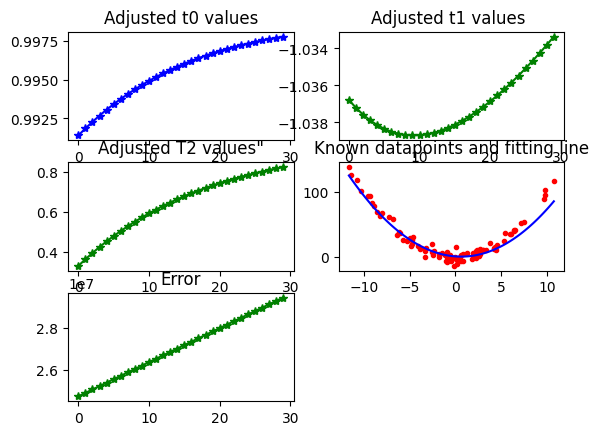

In [344]:
'''
Saat tässä tehtävässä koodin, jota käytettiin tunnilla suoran sovittamiseksi dataan

Tehtävät:

1) Sovita toisen asteen yhtälö f(x) = t2*x^2 + t1*x + t0 dataan. Funktio f(x) on paraabelin
eli toisen asteen yhtälön muotoinen. Eli sinun pitää siis osata derivoida
tunnettujen pisteiden ja funktiosta f(x) laskettujen pisteiden kustannusfunktio t2, t1 ja t0 parametrien suhteen,
jotta voit muodostaa luupin, jossa kaikkien noiden parametrien derivaatat lasketaan tunnetuista datapisteistä.

derivaatta t2:n suhteen virhefunktiosta:

dt2 = sum( 1/M * (t2*x**2 + t1*x+t0) * 1*x**2)
dt1 = sum( 1/M * (t2*x**2 + t1*x+t0) * x)
dt0 = sum( 1/M * (t2*x**2 + t1*x+t0) * 1)

2) Lisää tulostukseen myös t2 parametrien säätöarvot

3) Laske virhefunktion arvo jokaisen säätökerran jälkeen ja talleta myös nuo virhefunktion arvot
   vektoriin, josta arvoja voidaan tulostaa kuvaan simuloinnin edistyessä. Virheen arvonhan pitäisi
   pienentyä sitä mukaa, kun säädettävät parametrit t2,t1,t0 säätyvät kohdilleen.

   virhefkt = sum((   1 / M * (t2*xi**2+t1*xi + t0)-yi) ** 2   )
   i 0-> M asti

4) Pohdi miten saat nopeutettua laskentaa. Annetussa koodissa käytetään
vielä pythonin listoja ja ne kannattanee korvata NumPyn arrayksi.

5) Muuta plot komennot siten, että käytetään axes objekteja tuon
helpon matplotlib.pyplot sijasta ja vaikka niin, että yhteen kuvaan tulostetaan t0, t1 ja t2 säätökäyrät
eli kerätään nuo säätököyrät yhteen matriisiin ja printataan tuo matriisi.

'''

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# lets make first random data to which we try to fit a
# a straight line
M = 100
x = np.linspace(50,300,M)
y = x*1000 + 100000*np.random.random([M,])
# Data toisen asteen polynomisovitusta varten
x = 5*np.random.randn(M)
y = x**2 + 5*np.random.randn(M)

# now let's try to fit a line to that known data
# our hypothesis function h(x) = t1*x + t0, where
# t1 and t0 are randomly initialized parameters
t0 = np.random.randn(1)
t1 = np.random.randn(1)
t2 = np.random.randn(1)


# let's now iterate many times. I.e. each time
# we calculate a new gradient value for our cost function
# and we adjust your (originally random) t0 and t1 parameters
# towards hopefully right values
# and lets also collect adjusted t0 and t1 values
# to see how learning takes place.
t0_adjusted_values = []
t1_adjusted_values = []
t2_adjusted_values = []
virhe = []

rate = 0.00003   # this is learning rate parameter

plt.figure(1)
for rounds in range(30):
    grad_t0 = 0
    grad_t1 = 0
    grad_t2 = 0
    # lets calculate new gradient values for t0 and t1 based on
    # M known values
    for i in range(M):
        # our cost function c = (1/2M)*(h(x)-y)^2
        # where M = number of known values
        # partial derivatives for t1 and t0 are
        # t0 =>(1/M)*(h(x)-y)*1 => (1/M)*((t1*x(i) + t0) - y(i)) * 1
        # t1 =>(1/M)*(h(x)-y)*x => (1/M)*((t1*x(i) + t0) - y(i)) * x(i)
        # where i goes from 1 => M
        
        #grad_t0 = grad_t0 + ((t1*x[i] + t0) - y[i])
        #grad_t1 = grad_t1 + ((t1*x[i] + t0) - y[i]) * x[i]

        # Do the calculation only once where needed
        
        grad_t2 = grad_t2 + ((t2*x[i]**2 + t1*x[i]+t0) * 1*x[i]**2) -y[i]*x[i]**2
        grad_t1 = grad_t1 + ((t2*x[i]**2 + t1*x[i]+t0) * x[i]) -y[i]*x[i]
        grad_t0 = grad_t0 + ((t2*x[i]**2 + t1*x[i]+t0) * 1) -y[i]
        
        #virhefkt = sum((   1 / M * (t2*xi**2+t1*xi + t0)-yi) ** 2   )
        vir = vir + ((1 / M * t2*x[i]**2+t1*x[i] + t0)-y[i]) ** 2
    virhe.append(vir)

    # and now we can update parameters t0 and t1 with new gradient step
    t0 = t0 - (rate/(M*1.0))*grad_t0
    t1 = t1 - (rate/(M*1.0))*grad_t1
    t2 = t2 - (rate/(M*1.0))*grad_t2
    t0_adjusted_values.append(t0)
    t1_adjusted_values.append(t1)
    t2_adjusted_values.append(t2)
    

# and finally lets visualize results
xmin = np.min(x)
xmax = np.max(x)
x1 = np.linspace(xmin,xmax,100)
h = t2*x1**2 + t1*x1 +t0

plt.subplot(3,2,1)
plt.plot(t0_adjusted_values,'-*b')
plt.title('Adjusted t0 values')

plt.subplot(3,2,2)
plt.plot(t1_adjusted_values,'-*g')
plt.title('Adjusted t1 values ')

plt.subplot(3,2,3)
plt.plot(t2_adjusted_values, '-*g')
plt.title('Adjusted T2 values"')

plt.subplot(3,2,4)
#plt.clf()
plt.plot(x,y,'.r')
plt.plot(x1, h, '-b')
plt.title('Known datapoints and fitting line')

plt.subplot(3,2,5)
plt.plot(virhe, '-*g')
plt.title("Error")





# Vastaus
Jokin on vielä vialla, mutta ei nyt löydy enään tänään.

T0:  [-0.33642803]
T1:  [0.80055738]
T2:  [-0.48541371]
t0_adjusted_values_size:  100
t1_adjusted_values_size:  100
t2_adjusted_values_size:  100


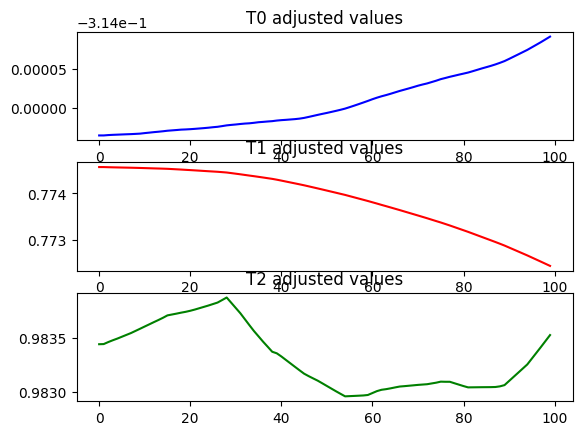

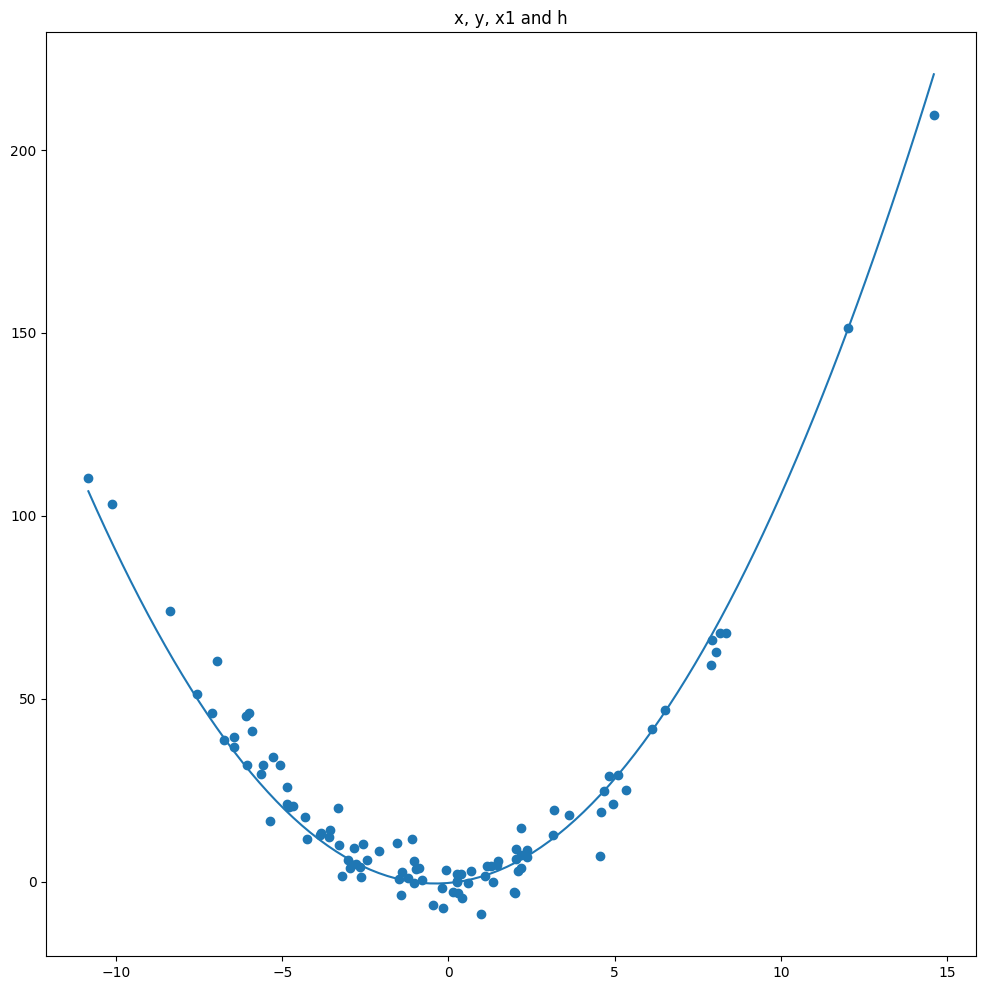

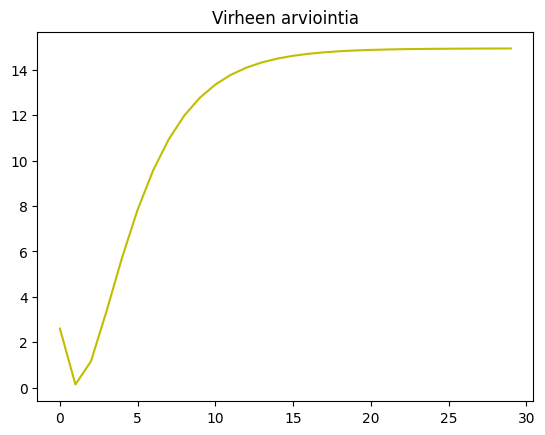

t0 viimeinen arvo: -0.31390868423304313
t1 viimeinen arvo: 0.7724469873925736
t2 viimeinen arvo: 0.9835224564322534


In [22]:
# Numpy taulukoina

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# lets make first random data to which we try to fit a
# a straight line
M = 100
x = np.linspace(50,300,M)
y = x*1000 + 100000*np.random.random([M,])
# Data toisen asteen polynomisovitusta varten
x = 5*np.random.randn(M)
y = x**2 + 5*np.random.randn(M)

#print("x = ", x)
#print("y = ", y)

# Random starting values for t0, t1, t2
t0 = np.random.randn(1)
t1 = np.random.randn(1)
t2 = np.random.randn(1)

print("T0: ", t0)
print("T1: ", t1)
print("T2: ", t2)

# taulukot arvojen säilytykseen. Pitäisi olla 100 nolla arvoa, koska M on 100
t0_adjusted_values = np.zeros(M)
t1_adjusted_values = np.zeros(M)
t2_adjusted_values = np.zeros(M)

print("t0_adjusted_values_size: ", t0_adjusted_values.size)
print("t1_adjusted_values_size: ", t1_adjusted_values.size)
print("t2_adjusted_values_size: ", t2_adjusted_values.size)

virhe = np.zeros(30)

rate = 0.0003   # this is learning rate parameter

plt.figure(1)
for rounds in range(30):
    grad_t0 = 0
    grad_t1 = 0
    grad_t2 = 0
    vir = 0
    # lets calculate new gradient values for t0 and t1 based on
    # M known values
    for i in range(M):
        # our cost function c = (1/2M)*(h(x)-y)^2
        # where M = number of known values
        # partial derivatives for t1 and t0 are
        # t0 =>(1/M)*(h(x)-y)*1 => (1/M)*((t1*x(i) + t0) - y(i)) * 1
        # t1 =>(1/M)*(h(x)-y)*x => (1/M)*((t1*x(i) + t0) - y(i)) * x(i)
        # where i goes from 1 => M
        
        #grad_t0 = grad_t0 + ((t1*x[i] + t0) - y[i])
        #grad_t1 = grad_t1 + ((t1*x[i] + t0) - y[i]) * x[i]
        """
        dt2 = sum( 1/M * (t2*x**2 + t1*x+t0) * 1*x**2)
        dt1 = sum( 1/M * (t2*x**2 + t1*x+t0) * x)
        dt0 = sum( 1/M * (t2*x**2 + t1*x+t0) * 1)

        näistä ongelmana on se, että ei ole ytä lainkaan.
        """
        # Do the calculation only once where needed
        inner = (t2 * x[i] ** 2) + (t1 * x[i]) + t0

        grad_t0 = grad_t0 + (1 / M * (inner - y[i]))
        grad_t1 = grad_t1 + (1 / M * (inner - y[i]) * x[i])
        grad_t2 = grad_t2 + (1 / M * (inner - y[i]) * x[i] ** 2)

        #virhefkt = sum((   1 / M * (t2*xi**2+t1*xi + t0)-yi) ** 2   )
        vir = vir + ((1 / M * inner) ** 2)      # Error counting for the round.
        t0 = t0 - (rate/(M*1.0))*grad_t0
        t1 = t1 - (rate/(M*1.0))*grad_t1
        t2 = t2 - (rate/(M*1.0))*grad_t2
        #print(f"t0 = {t0}, t0.item() = {t0.item()}")
        # Add adjusted values to arrays..
        t0_adjusted_values[i] = t0.item() 
        t1_adjusted_values[i] = t1.item() 
        t2_adjusted_values[i] = t2.item()
    # Add errors to the virhe array, This doesn't give the right direction every time. Downward most times, but sometimes draws an upward trend.
    virhe[rounds] = vir.item()
    

# and finally lets visualize results
xmin = np.min(x)
xmax = np.max(x)
x1 = np.linspace(xmin,xmax,100)
h = t1*x1 + t0
h = t2*x1**2 + t1*x1 +t0

#print(x1,h)



# Making a plot with plt.figure()
plt.figure(figsize=(12,12))
fig = plt.figure(num=1)
ax = fig.add_subplot(311)
plt.title('T0 adjusted values')
ax.plot(t0_adjusted_values, "-b")
plt.xlabel("T0 values")
ax = fig.add_subplot(312)
plt.title('T1 adjusted values')
ax.plot(t1_adjusted_values, "-r")
ax = fig.add_subplot(313)
plt.title('T2 adjusted values')
ax.plot(t2_adjusted_values, "-g")


fig = plt.figure(num=2)
bx = fig.add_subplot(111)
bx.scatter(x,y, label="x and y")
bx.plot(x1,h, label="x1 and h")
plt.title('x, y, x1 and h')

fig = plt.figure(num=3)
cx = fig.add_subplot(111)
cx.plot(virhe, "-y", label="Virhe")
plt.title("Virheen arviointia")

plt.show()

print(f"t0 viimeinen arvo: {t0_adjusted_values[99]}")
print(f"t1 viimeinen arvo: {t1_adjusted_values[99]}")
print(f"t2 viimeinen arvo: {t2_adjusted_values[99]}")